File to run PCA on the simulation data using a python library rather than ptraj. The point of this is to compare the results and validate the ptraj scripts are working properly

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm

import mdtraj as md
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load in the simulation data (every 10 frames)
traj_new = []
traj_new.append(md.load_netcdf("/data/nvanhoorn/A3F_newstructure/VCBC_A3F_GLU_mut/redoing_everything/mdcrd/VCBC-A3F_GLU_mut_sims1-8_first300_noBox.mdcrd", 
                          top="/data/nvanhoorn/A3F_newstructure/VCBC_A3F_GLU_mut/redoing_everything/VCBC-A3F_GLU_mut_nowat.prmtop", stride=10))
traj_new.append(md.load_netcdf("/data/nvanhoorn/A3F_newstructure/VCBC_A3F_GLU_mut/redoing_everything/WT_files/VCBC-A3F_WT_sims1-8_first300_noBox.mdcrd", 
                          top="/data/nvanhoorn/A3F_newstructure/VCBC_A3F_GLU_mut/redoing_everything/WT_files/VCBC-A3F_WT_nowat.prmtop", stride=10))

In [3]:
starting_struct = md.load_pdb("/data/nvanhoorn/A3F_newstructure/VCBC_A3F_GLU_mut/redoing_everything/WT_files/VCBC-A3F_WT_tleap.pdb")

In [4]:
traj_new

[<mdtraj.Trajectory with 48000 frames, 12053 atoms, 747 residues, without unitcells at 0x1554254801d0>,
 <mdtraj.Trajectory with 48000 frames, 12060 atoms, 747 residues, without unitcells at 0x1554118900b0>]

In [5]:
# Remove atoms that are not a part of the backbone
traj_new[0].atom_slice(traj_new[0].topology.select('backbone'), inplace=True)
traj_new[1].atom_slice(traj_new[1].topology.select('backbone'), inplace=True)
starting_struct.atom_slice(traj_new[1].topology.select('backbone'), inplace=True)

<mdtraj.Trajectory with 1 frames, 2968 atoms, 178 residues, without unitcells at 0x155411987e00>

In [6]:
# # align the trajectories
traj_new[1].superpose(traj_new[0])
traj_new[0].superpose(traj_new[0])
starting_struct.superpose(traj_new[0])

<mdtraj.Trajectory with 1 frames, 2968 atoms, 178 residues, without unitcells at 0x155411987e00>

In [8]:
# Extract the x,y,z coordinates fromt the trajectory objects
coordinatesGLU = traj_new[0].xyz
coordinatesWT = traj_new[1].xyz
Startcoordinates = starting_struct.xyz

print(coordinatesGLU.shape, coordinatesWT.shape, Startcoordinates.shape)

(48000, 2968, 3) (48000, 2968, 3) (1, 2968, 3)


In [9]:
train_data = np.concatenate((coordinatesGLU, coordinatesWT))

print(train_data.shape)  

train_data = train_data[::]

(96000, 2968, 3)


In [10]:
# Flatten to (n_frames, n_atoms * 3)

train_data = train_data.reshape(train_data.shape[0], -1) 
start_struct_data = Startcoordinates.reshape(Startcoordinates.shape[0], -1)
print(train_data.shape)

(96000, 8904)


In [11]:
train_data

array([[ 2.7646387,  4.792783 , 11.494975 , ...,  4.0472684,  3.3697793,
        14.09084  ],
       [ 2.735433 ,  4.787917 , 11.636822 , ...,  4.160372 ,  3.1476872,
        14.345175 ],
       [ 2.780947 ,  4.8121715, 11.521578 , ...,  4.199376 ,  3.5639646,
        14.124228 ],
       ...,
       [ 3.1386228,  4.244601 , 12.302906 , ...,  4.2199764,  2.8939617,
        13.880112 ],
       [ 3.0978749,  4.393424 , 12.362138 , ...,  4.200395 ,  2.8731737,
        13.848095 ],
       [ 3.131182 ,  4.2506995, 12.338176 , ...,  4.292874 ,  2.7783258,
        13.914901 ]], dtype=float32)

In [12]:
#Scaling the data was originall included in this analysis, but on later consideration was removed 

# scaler = StandardScaler()
# train_data = scaler.fit_transform(train_data)
# start_struct_data = scaler.transform(start_struct_data)

In [13]:
train_data

array([[ 2.7646387,  4.792783 , 11.494975 , ...,  4.0472684,  3.3697793,
        14.09084  ],
       [ 2.735433 ,  4.787917 , 11.636822 , ...,  4.160372 ,  3.1476872,
        14.345175 ],
       [ 2.780947 ,  4.8121715, 11.521578 , ...,  4.199376 ,  3.5639646,
        14.124228 ],
       ...,
       [ 3.1386228,  4.244601 , 12.302906 , ...,  4.2199764,  2.8939617,
        13.880112 ],
       [ 3.0978749,  4.393424 , 12.362138 , ...,  4.200395 ,  2.8731737,
        13.848095 ],
       [ 3.131182 ,  4.2506995, 12.338176 , ...,  4.292874 ,  2.7783258,
        13.914901 ]], dtype=float32)

In [14]:
# PCA tutorial used : https://www.geeksforgeeks.org/principal-component-analysis-pca/

In [15]:
n_components=10
pca = PCA(n_components=n_components)
pca.fit(train_data)


x_pca = pca.transform(train_data)

# Create the dataframe
df_pca1 = pd.DataFrame(x_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(n_components)])

In [16]:
df_pca1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-5.820284,3.195984,-2.218050,0.146341,5.076250,3.797890,4.047328,1.672291,0.488688,6.193590
1,-8.890532,5.824661,-4.152231,-0.598236,6.104238,3.900684,4.510113,0.794353,0.564254,5.716427
2,-8.738932,6.591873,-4.027632,-0.679674,5.944344,3.759094,4.312703,0.621958,0.635967,5.891228
3,-10.308588,9.415619,-1.589283,-1.059469,5.074379,3.998547,3.602193,-0.168768,-0.379731,6.169176
4,-11.060031,9.325226,-1.786249,-1.058859,5.320195,3.912222,4.161340,-0.194008,-0.991331,6.208969
...,...,...,...,...,...,...,...,...,...,...
95995,-5.786688,9.325516,-3.622253,6.509378,-11.272997,1.187820,-1.850187,-1.066032,-0.813914,-4.557680
95996,-6.263166,9.752960,-4.100929,6.050375,-10.211205,1.002174,-1.471881,-0.787956,-0.288327,-4.670377
95997,-5.698805,10.222862,-3.436272,8.074413,-9.807123,0.522169,-1.650464,0.196268,0.232430,-4.399607
95998,-6.074854,9.222466,-2.664772,7.640638,-10.268677,0.186563,-1.775302,-0.269892,-0.103209,-4.354638


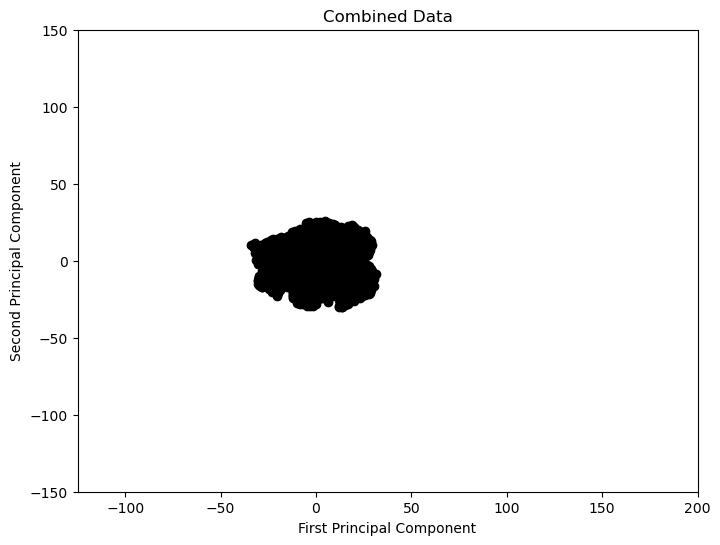

In [17]:
plt.figure(figsize=(8, 6))

plt.scatter(x_pca[:, 0], x_pca[:, 1], c='black')

plt.xlim([-125,200])
plt.ylim([-150,150])
plt.title('Combined Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [18]:
GLU_data = coordinatesGLU.reshape(coordinatesGLU.shape[0], -1) 
WT_data = coordinatesWT.reshape(coordinatesWT.shape[0], -1) 

In [19]:
# GLU_data = scaler.transform(GLU_data)
# WT_data = scaler.transform(WT_data)

In [20]:
GLU_pca = pca.transform(GLU_data)

# Create the dataframe
df_pca_GLU = pd.DataFrame(GLU_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(n_components)])

In [21]:
df_pca_GLU

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-5.820284,3.195984,-2.218050,0.146341,5.076250,3.797890,4.047328,1.672291,0.488688,6.193590
1,-8.890532,5.824661,-4.152231,-0.598236,6.104238,3.900684,4.510113,0.794353,0.564254,5.716427
2,-8.738932,6.591873,-4.027632,-0.679674,5.944344,3.759094,4.312703,0.621958,0.635967,5.891228
3,-10.308588,9.415619,-1.589283,-1.059469,5.074379,3.998547,3.602193,-0.168768,-0.379731,6.169176
4,-11.060031,9.325226,-1.786249,-1.058859,5.320195,3.912222,4.161340,-0.194008,-0.991331,6.208969
...,...,...,...,...,...,...,...,...,...,...
47995,-9.843641,-3.194298,-2.803671,0.091932,5.501338,-2.025431,-8.801943,-0.740791,-6.712396,4.087326
47996,-10.087770,-3.547142,-4.636581,0.446619,6.293495,-2.731409,-8.037949,-0.595888,-5.638867,2.894163
47997,-9.638826,-5.066566,-4.219627,1.557968,5.932402,-2.025724,-8.716490,-1.858461,-5.792474,2.728052
47998,-8.151779,-5.121498,-3.284769,1.729427,6.084953,-1.790972,-9.580210,-2.262411,-5.690726,3.119051


In [22]:
WT_pca = pca.transform(WT_data)

# Create the dataframe
df_pca_WT = pd.DataFrame(WT_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(n_components)])

In [23]:
df_pca_WT

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-2.263340,12.536804,-4.521706,0.269506,7.320526,3.741549,2.768171,1.070818,-1.451915,5.174308
1,-1.452936,12.356377,-5.652058,-0.838011,7.920025,2.716652,3.448796,2.213577,-1.055532,5.122204
2,-4.692616,10.940346,-6.266407,0.111252,7.439500,2.540829,3.933301,2.143396,-1.097136,6.058153
3,-4.365309,9.303284,-6.134287,1.788588,8.002278,3.539360,4.084660,2.648302,1.317912,4.881028
4,-2.000879,8.272919,-6.178444,2.904318,8.962742,4.763638,5.298788,2.129433,2.654999,3.363351
...,...,...,...,...,...,...,...,...,...,...
47995,-5.786688,9.325516,-3.622253,6.509378,-11.272997,1.187820,-1.850187,-1.066032,-0.813914,-4.557680
47996,-6.263166,9.752960,-4.100929,6.050375,-10.211205,1.002174,-1.471881,-0.787956,-0.288327,-4.670377
47997,-5.698805,10.222862,-3.436272,8.074413,-9.807123,0.522169,-1.650464,0.196268,0.232430,-4.399607
47998,-6.074854,9.222466,-2.664772,7.640638,-10.268677,0.186563,-1.775302,-0.269892,-0.103209,-4.354638


In [24]:
struct_pca = pca.transform(start_struct_data)

# Create the dataframe
df_pca_struct = pd.DataFrame(struct_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(n_components)])

In [25]:
df_pca_struct

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-14.959696,67.786713,11.538955,29.569107,26.810833,30.032497,6.147161,-26.779322,21.360579,-14.249186


### Classic figures

In [26]:
PC1min = min(min(GLU_pca[:, 0]), min(WT_pca[:, 0])) - 25
PC1max = max(max(GLU_pca[:, 0]), max(WT_pca[:, 0])) + 25
PC2min = min(min(GLU_pca[:, 1]), min(WT_pca[:, 1])) - 25
PC2max = max(max(GLU_pca[:, 1]), max(WT_pca[:, 1])) + 25
PC3min = min(min(GLU_pca[:, 2]), min(WT_pca[:, 2])) - 25
PC3max = max(max(GLU_pca[:, 2]), max(WT_pca[:, 2])) + 25
PC4min = min(min(GLU_pca[:, 3]), min(WT_pca[:, 3])) - 25
PC4max = max(max(GLU_pca[:, 3]), max(WT_pca[:, 3])) + 25

Text(0, 0.5, 'PC2')

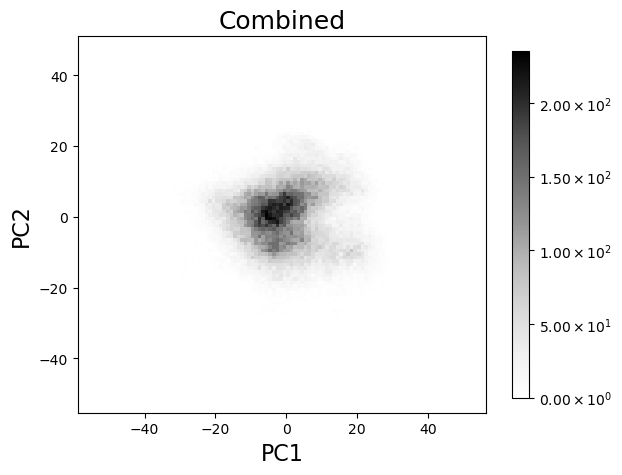

In [27]:
binedges = np.arange(-550,550,1) # create array for bin edges
GLU_fig = np.histogram2d(df_pca1['PC1'], df_pca1['PC2'], 
                         bins=binedges)
max_shade = GLU_fig[0].max()
PC1_2_colormap = plt.figure(figsize=(14.5,9))
plt.subplot(1, 2, 1)
PC2_VCBC, PC1_VCBC = np.meshgrid(binedges,binedges) 
plt.pcolormesh(PC1_VCBC, PC2_VCBC, GLU_fig[0], cmap = 'Greys', vmax = max_shade)
plt.axis('image')
plt.xlim([PC1min, PC1max])
plt.ylim([PC2min, PC2max])
def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)
plt.colorbar(shrink = 0.50, format=ticker.FuncFormatter(fmt))
plt.scatter(x = df_pca_struct["PC1"][0], y = df_pca_struct["PC2"][0], color='k', 
         marker='x', s = 75, linewidth = 1, label = "VCBC pdb")
plt.title('Combined', size= 18) 
plt.xlabel('PC1',size= 16) 
plt.ylabel('PC2',size= 16)

Text(0, 0.5, 'PC2')

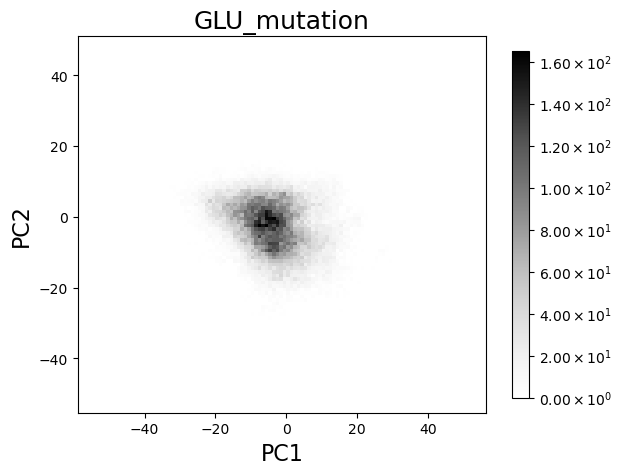

In [28]:
binedges = np.arange(-550,550,1) # create array for bin edges
GLU_fig = np.histogram2d(df_pca_GLU['PC1'], df_pca_GLU['PC2'], 
                         bins=binedges)
max_shade = GLU_fig[0].max()
PC1_2_colormap = plt.figure(figsize=(14.5,9))
plt.subplot(1, 2, 1)
PC2_VCBC, PC1_VCBC = np.meshgrid(binedges,binedges) 
plt.pcolormesh(PC1_VCBC, PC2_VCBC, GLU_fig[0], cmap = 'Greys', vmax = max_shade)
plt.axis('image')
plt.xlim([PC1min, PC1max])
plt.ylim([PC2min, PC2max])
def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)
plt.colorbar(shrink = 0.50, format=ticker.FuncFormatter(fmt))
plt.scatter(x = df_pca_struct["PC1"][0], y = df_pca_struct["PC2"][0], color='k', 
         marker='x', s = 75, linewidth = 1, label = "VCBC pdb")
plt.title('GLU_mutation', size= 18) 
plt.xlabel('PC1',size= 16) 
plt.ylabel('PC2',size= 16)

Text(0, 0.5, 'PC2')

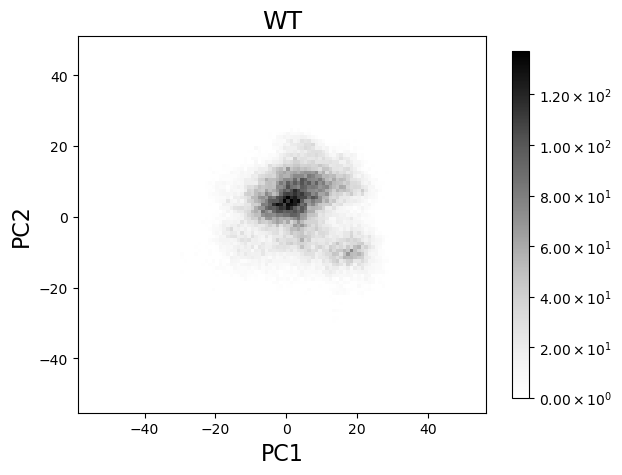

In [29]:
binedges = np.arange(-550,550,1) # create array for bin edges

WT_fig = np.histogram2d(df_pca_WT['PC1'], df_pca_WT['PC2'], 
                         bins=binedges)
max_shade = WT_fig[0].max()
PC1_2_colormap = plt.figure(figsize=(14.5,9))
plt.subplot(1, 2, 1)
PC2_VCBC, PC1_VCBC = np.meshgrid(binedges,binedges) 
plt.pcolormesh(PC1_VCBC,PC2_VCBC,WT_fig[0], cmap = 'Greys', vmax = max_shade)
plt.axis('image')
plt.xlim([PC1min, PC1max])
plt.ylim([PC2min, PC2max])

plt.colorbar(shrink = 0.50, format=ticker.FuncFormatter(fmt))
plt.scatter(x = df_pca_struct["PC1"][0], y = df_pca_struct["PC2"][0], color='k', 
         marker='x', s = 75, linewidth = 1, label = "VCBC pdb")
plt.title('WT', size= 18) 
plt.xlabel('PC1',size= 16) 
plt.ylabel('PC2',size= 16)

Text(0, 0.5, 'PC4')

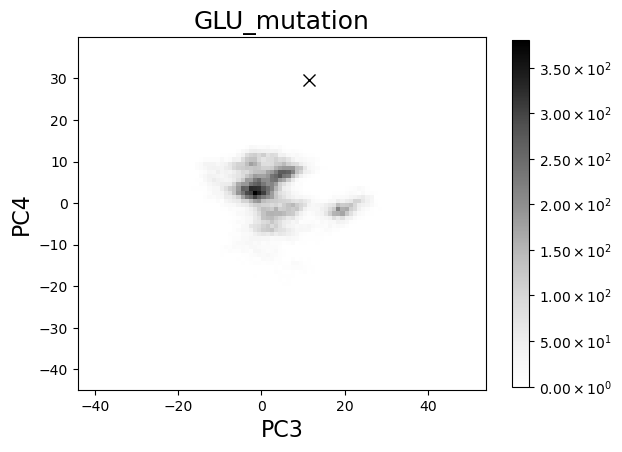

In [30]:
binedges = np.arange(-550,550,1) # create array for bin edges
GLU_fig = np.histogram2d(df_pca_GLU['PC3'], df_pca_GLU['PC4'], 
                         bins=binedges)
max_shade = GLU_fig[0].max()
PC1_2_colormap = plt.figure(figsize=(14.5,9))
plt.subplot(1, 2, 1)
PC2_VCBC, PC1_VCBC = np.meshgrid(binedges,binedges) 

plt.pcolormesh(PC1_VCBC, PC2_VCBC, GLU_fig[0], cmap = 'Greys', vmax = max_shade)
plt.axis('image')
plt.xlim([PC3min, PC3max])
plt.ylim([PC4min, PC4max])

plt.colorbar(shrink = 0.50, format=ticker.FuncFormatter(fmt))
plt.scatter(x = df_pca_struct["PC3"][0], y = df_pca_struct["PC4"][0], color='k', 
         marker='x', s = 75, linewidth = 1, label = "VCBC pdb")
plt.title('GLU_mutation', size= 18) 
plt.xlabel('PC3',size= 16) 
plt.ylabel('PC4',size= 16)

Text(0, 0.5, 'PC4')

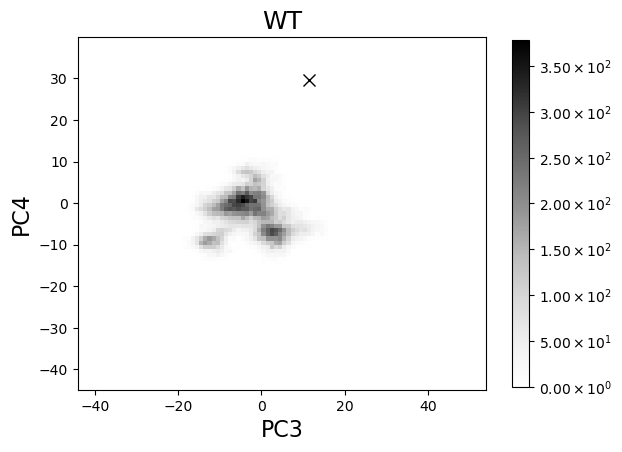

In [31]:
binedges = np.arange(-50,45,1) # create array for bin edges

WT_fig = np.histogram2d(df_pca_WT['PC3'], df_pca_WT['PC4'], 
                         bins=binedges)
max_shade = WT_fig[0].max()
PC1_2_colormap = plt.figure(figsize=(14.5,9))
plt.subplot(1, 2, 1)
PC2_VCBC, PC1_VCBC = np.meshgrid(binedges,binedges) 
plt.pcolormesh(PC1_VCBC,PC2_VCBC,WT_fig[0], cmap = 'Greys', vmax = max_shade)
plt.axis('image')
plt.xlim([PC3min, PC3max])
plt.ylim([PC4min, PC4max])

plt.colorbar(shrink = 0.50, format=ticker.FuncFormatter(fmt))
plt.scatter(x = df_pca_struct["PC3"][0], y = df_pca_struct["PC4"][0], color='k', 
         marker='x', s = 75, linewidth = 1, label = "VCBC pdb")
plt.title('WT', size= 18) 
plt.xlabel('PC3',size= 16) 
plt.ylabel('PC4',size= 16)

In [32]:
df_pca_GLU.std()

PC1     8.413542
PC2     6.988178
PC3     7.704378
PC4     5.456853
PC5     3.720292
PC6     4.316317
PC7     4.786073
PC8     4.021960
PC9     3.898432
PC10    2.507365
dtype: float32

In [33]:
df_pca_WT.std()

PC1     9.802905
PC2     8.839787
PC3     6.199517
PC4     4.800408
PC5     5.093625
PC6     4.385017
PC7     3.320504
PC8     3.678542
PC9     2.895331
PC10    3.762031
dtype: float32

In [34]:
df_pca_GLU.mean()

PC1    -4.007551
PC2    -2.667708
PC3     2.822752
PC4     2.441814
PC5     2.498194
PC6     0.159186
PC7    -0.250468
PC8    -0.003186
PC9    -0.010581
PC10   -0.086887
dtype: float32

In [35]:
df_pca_WT.mean()

PC1     4.007534
PC2     2.667646
PC3    -2.822667
PC4    -2.441873
PC5    -2.498159
PC6    -0.159256
PC7     0.250386
PC8     0.003164
PC9     0.010649
PC10    0.086845
dtype: float32

In [36]:
df_pca1.std()

PC1     9.975075
PC2     8.402625
PC3     7.540754
PC4     5.689723
PC5     5.112093
PC6     4.353693
PC7     4.126579
PC8     3.854059
PC9     3.433708
PC10    3.198018
dtype: float32

In [47]:
df_pca1.mean()

PC1     0.000008
PC2    -0.000027
PC3     0.000045
PC4    -0.000025
PC5     0.000024
PC6    -0.000036
PC7    -0.000041
PC8    -0.000011
PC9     0.000034
PC10   -0.000022
dtype: float32

In [37]:
#The amount of variance explained by each of the selected components. The variance estimation uses n_samples - 1 degrees of freedom.
#Equal to n_components largest eigenvalues of the covariance matrix of X.
print (f" Amount of variance explained by top ten components: {pca.explained_variance_}")
print()

# Percentage of variance explained by each of the selected components.
# If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.
print (f" Percentage of variance explained by the top ten components: {pca.explained_variance_ratio_}")
print()

# returns a vector x such that x[i] returns the cumulative variance explained by the first i+1 dimensions.
# https://stackoverflow.com/questions/32857029/python-scikit-learn-pca-explained-variance-ratio-cutoff
print (f" Cumulative variance explained by the top ten components: {pca.explained_variance_ratio_.cumsum()}")

 Amount of variance explained by top ten components: [99.50207815 70.60404275 56.86292566 32.37293618 26.13349618 18.95464015
 17.02865525 14.85376671 11.79034938 10.22730315]

 Percentage of variance explained by the top ten components: [0.20387937 0.14466741 0.11651191 0.06633202 0.05354743 0.03883798
 0.03489165 0.03043531 0.02415838 0.0209557 ]

 Cumulative variance explained by the top ten components: [0.20387937 0.34854678 0.46505869 0.53139071 0.58493814 0.62377613
 0.65866778 0.68910309 0.71326147 0.73421717]


## P values

Adapted from "Permutation_PCA" notebook

In [38]:
GLU_pca = df_pca_GLU
WT_pca = df_pca_WT
pdb_PCA = df_pca_struct

In [39]:
GLU_Mean_std_PC1and2 = {"Simulation":["1","2","3","4","5","6","7","8"],
                    'Mean_PC1':[GLU_pca['PC1'][1:6000:10].mean(),
                    GLU_pca['PC1'][6001:12000:10].mean(),
                    GLU_pca['PC1'][12001:18000:10].mean(),
                    GLU_pca['PC1'][18001:24000:10].mean(),
                    GLU_pca['PC1'][24001:30000:10].mean(),
                    GLU_pca['PC1'][30001:36000:10].mean(),
                    GLU_pca['PC1'][36001:42000:10].mean(),
                    GLU_pca['PC1'][42001:48000:10].mean()], 
     'Variance_PC1':[GLU_pca['PC1'][1:6000:10].var(),
                    GLU_pca['PC1'][6001:12000:10].var(),
                    GLU_pca['PC1'][12001:18000:10].var(),
                    GLU_pca['PC1'][18001:24000:10].var(),
                    GLU_pca['PC1'][24001:30000:10].var(),
                    GLU_pca['PC1'][30001:36000:10].var(),
                    GLU_pca['PC1'][36001:42000:10].var(),
                    GLU_pca['PC1'][42001:48000:10].var()],
     'Mean_PC2': [GLU_pca['PC2'][1:6000:10].mean(),
                    GLU_pca['PC2'][6001:12000:10].mean(),
                    GLU_pca['PC2'][12001:18000:10].mean(),
                    GLU_pca['PC2'][18001:24000:10].mean(),
                    GLU_pca['PC2'][24001:30000:10].mean(),
                    GLU_pca['PC2'][30001:36000:10].mean(),
                    GLU_pca['PC2'][36001:42000:10].mean(),
                    GLU_pca['PC2'][42001:48000:10].mean()],
     "Variance_PC2":[GLU_pca['PC2'][1:6000:10].var(),
                    GLU_pca['PC2'][6001:12000:10].var(),
                    GLU_pca['PC2'][12001:18000:10].var(),
                    GLU_pca['PC2'][18001:24000:10].var(),
                    GLU_pca['PC2'][24001:30000:10].var(),
                    GLU_pca['PC2'][30001:36000:10].var(),
                    GLU_pca['PC2'][36001:42000:10].var(),
                    GLU_pca['PC2'][42001:48000:10].var()],
     'Mean_PC3': [GLU_pca['PC3'][1:6000:10].mean(),
                    GLU_pca['PC3'][6001:12000:10].mean(),
                    GLU_pca['PC3'][12001:18000:10].mean(),
                    GLU_pca['PC3'][18001:24000:10].mean(),
                    GLU_pca['PC3'][24001:30000:10].mean(),
                    GLU_pca['PC3'][30001:36000:10].mean(),
                    GLU_pca['PC3'][36001:42000:10].mean(),
                    GLU_pca['PC3'][42001:48000:10].mean()],
     "Variance_PC3":[GLU_pca['PC3'][1:6000:10].var(),
                    GLU_pca['PC3'][6001:12000:10].var(),
                    GLU_pca['PC3'][12001:18000:10].var(),
                    GLU_pca['PC3'][18001:24000:10].var(),
                    GLU_pca['PC3'][24001:30000:10].var(),
                    GLU_pca['PC3'][30001:36000:10].var(),
                    GLU_pca['PC3'][36001:42000:10].var(),
                    GLU_pca['PC3'][42001:48000:10].var()],
     'Mean_PC4': [GLU_pca['PC4'][1:6000:10].mean(),
                    GLU_pca['PC4'][6001:12000:10].mean(),
                    GLU_pca['PC4'][12001:18000:10].mean(),
                    GLU_pca['PC4'][18001:24000:10].mean(),
                    GLU_pca['PC4'][24001:30000:10].mean(),
                    GLU_pca['PC4'][30001:36000:10].mean(),
                    GLU_pca['PC4'][36001:42000:10].mean(),
                    GLU_pca['PC4'][42001:48000:10].mean()],
     "Variance_PC4":[GLU_pca['PC4'][1:6000:10].var(),
                    GLU_pca['PC4'][6001:12000:10].var(),
                    GLU_pca['PC4'][12001:18000:10].var(),
                    GLU_pca['PC4'][18001:24000:10].var(),
                    GLU_pca['PC4'][24001:30000:10].var(),
                    GLU_pca['PC4'][30001:36000:10].var(),
                    GLU_pca['PC4'][36001:42000:10].var(),
                    GLU_pca['PC4'][42001:48000:10].var()],
            "PDB_PC1":[pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values],
            "PDB_PC2":[pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values],
            "PDB_PC3":[pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values],
            "PDB_PC4":[pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values],}
GLU_Mean_std_PC1and2_df = pd.DataFrame(data = GLU_Mean_std_PC1and2)
# GLU_Mean_std_PC1and2_df["Meandiffsqr_PC1"]= (GLU_Mean_std_PC1and2_df["Mean_PC1"]- GLU_Mean_std_PC1and2_df["PDB_PC1"])**2
# GLU_Mean_std_PC1and2_df["Meandiffsqr_PC2"]= (GLU_Mean_std_PC1and2_df["Mean_PC2"]- GLU_Mean_std_PC1and2_df["PDB_PC2"])**2
# GLU_Mean_std_PC1and2_df["Meandiffsqr_PC3"]= (GLU_Mean_std_PC1and2_df["Mean_PC3"]- GLU_Mean_std_PC1and2_df["PDB_PC3"])**2
# GLU_Mean_std_PC1and2_df["Meandiffsqr_PC4"]= (GLU_Mean_std_PC1and2_df["Mean_PC4"]- GLU_Mean_std_PC1and2_df["PDB_PC4"])**2

GLU_Mean_std_PC1and2_df["Meandiffsqr_PC1"]= (GLU_Mean_std_PC1and2_df["PDB_PC1"] -GLU_Mean_std_PC1and2_df["Mean_PC1"])**2
GLU_Mean_std_PC1and2_df["Meandiffsqr_PC2"]= (GLU_Mean_std_PC1and2_df["PDB_PC1"]- GLU_Mean_std_PC1and2_df["Mean_PC1"])**2
GLU_Mean_std_PC1and2_df["Meandiffsqr_PC3"]= (GLU_Mean_std_PC1and2_df["PDB_PC1"]- GLU_Mean_std_PC1and2_df["Mean_PC1"])**2
GLU_Mean_std_PC1and2_df["Meandiffsqr_PC4"]= (GLU_Mean_std_PC1and2_df["PDB_PC1"]- GLU_Mean_std_PC1and2_df["Mean_PC1"])**2
# GLU_Mean_std_PC1and2_df


In [40]:
WT_Mean_std_PC1and2 = {"Simulation":["1","2","3","4","5","6","7","8"],
                    'Mean_PC1':[WT_pca['PC1'][1:6000:10].mean(),
                    WT_pca['PC1'][6001:12000:10].mean(),
                    WT_pca['PC1'][12001:18000:10].mean(),
                    WT_pca['PC1'][18001:24000:10].mean(),
                    WT_pca['PC1'][24001:30000:10].mean(),
                    WT_pca['PC1'][30001:36000:10].mean(),
                    WT_pca['PC1'][36001:42000:10].mean(),
                    WT_pca['PC1'][42001:48000:10].mean()], 
     'Variance_PC1':[WT_pca['PC1'][1:6000:10].var(),
                    WT_pca['PC1'][6001:12000:10].var(),
                    WT_pca['PC1'][12001:18000:10].var(),
                    WT_pca['PC1'][18001:24000:10].var(),
                    WT_pca['PC1'][24001:30000:10].var(),
                    WT_pca['PC1'][30001:36000:10].var(),
                    WT_pca['PC1'][36001:42000:10].var(),
                    WT_pca['PC1'][42001:48000:10].var()],
     'Mean_PC2': [WT_pca['PC2'][1:6000:10].mean(),
                    WT_pca['PC2'][6001:12000:10].mean(),
                    WT_pca['PC2'][12001:18000:10].mean(),
                    WT_pca['PC2'][18001:24000:10].mean(),
                    WT_pca['PC2'][24001:30000:10].mean(),
                    WT_pca['PC2'][30001:36000:10].mean(),
                    WT_pca['PC2'][36001:42000:10].mean(),
                    WT_pca['PC2'][42001:48000:10].mean()],
     "Variance_PC2":[WT_pca['PC2'][1:6000:10].var(),
                    WT_pca['PC2'][6001:12000:10].var(),
                    WT_pca['PC2'][12001:18000:10].var(),
                    WT_pca['PC2'][18001:24000:10].var(),
                    WT_pca['PC2'][24001:30000:10].var(),
                    WT_pca['PC2'][30001:36000:10].var(),
                    WT_pca['PC2'][36001:42000:10].var(),
                    WT_pca['PC2'][42001:48000:10].var()],
     'Mean_PC3': [WT_pca['PC3'][1:6000:10].mean(),
                    WT_pca['PC3'][6001:12000:10].mean(),
                    WT_pca['PC3'][12001:18000:10].mean(),
                    WT_pca['PC3'][18001:24000:10].mean(),
                    WT_pca['PC3'][24001:30000:10].mean(),
                    WT_pca['PC3'][30001:36000:10].mean(),
                    WT_pca['PC3'][36001:42000:10].mean(),
                    WT_pca['PC3'][42001:48000:10].mean()],
     "Variance_PC3":[WT_pca['PC3'][1:6000:10].var(),
                    WT_pca['PC3'][6001:12000:10].var(),
                    WT_pca['PC3'][12001:18000:10].var(),
                    WT_pca['PC3'][18001:24000:10].var(),
                    WT_pca['PC3'][24001:30000:10].var(),
                    WT_pca['PC3'][30001:36000:10].var(),
                    WT_pca['PC3'][36001:42000:10].var(),
                    WT_pca['PC3'][42001:48000:10].var()],
     'Mean_PC4': [WT_pca['PC4'][1:6000:10].mean(),
                    WT_pca['PC4'][6001:12000:10].mean(),
                    WT_pca['PC4'][12001:18000:10].mean(),
                    WT_pca['PC4'][18001:24000:10].mean(),
                    WT_pca['PC4'][24001:30000:10].mean(),
                    WT_pca['PC4'][30001:36000:10].mean(),
                    WT_pca['PC4'][36001:42000:10].mean(),
                    WT_pca['PC4'][42001:48000:10].mean()],
     "Variance_PC4":[WT_pca['PC4'][1:6000:10].var(),
                    WT_pca['PC4'][6001:12000:10].var(),
                    WT_pca['PC4'][12001:18000:10].var(),
                    WT_pca['PC4'][18001:24000:10].var(),
                    WT_pca['PC4'][24001:30000:10].var(),
                    WT_pca['PC4'][30001:36000:10].var(),
                    WT_pca['PC4'][36001:42000:10].var(),
                    WT_pca['PC4'][42001:48000:10].var()],
            "PDB_PC1":[pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values,
                     pdb_PCA["PC1"].values],
            "PDB_PC2":[pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values,
                     pdb_PCA["PC2"].values],
            "PDB_PC3":[pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values,
                     pdb_PCA["PC3"].values],
            "PDB_PC4":[pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values,
                     pdb_PCA["PC4"].values],}
WT_Mean_std_PC1and2_df = pd.DataFrame(data = WT_Mean_std_PC1and2)
# WT_Mean_std_PC1and2_df["Meandiffsqr_PC1"]= (WT_Mean_std_PC1and2_df["Mean_PC1"]- WT_Mean_std_PC1and2_df["PDB_PC1"])**2
# WT_Mean_std_PC1and2_df["Meandiffsqr_PC2"]= (WT_Mean_std_PC1and2_df["Mean_PC2"]- WT_Mean_std_PC1and2_df["PDB_PC2"])**2
# WT_Mean_std_PC1and2_df["Meandiffsqr_PC3"]= (WT_Mean_std_PC1and2_df["Mean_PC3"]- WT_Mean_std_PC1and2_df["PDB_PC3"])**2
# WT_Mean_std_PC1and2_df["Meandiffsqr_PC4"]= (WT_Mean_std_PC1and2_df["Mean_PC4"]- WT_Mean_std_PC1and2_df["PDB_PC4"])**2

WT_Mean_std_PC1and2_df["Meandiffsqr_PC1"]= (WT_Mean_std_PC1and2_df["PDB_PC1"]- WT_Mean_std_PC1and2_df["Mean_PC1"])**2
WT_Mean_std_PC1and2_df["Meandiffsqr_PC2"]= (WT_Mean_std_PC1and2_df["PDB_PC1"]- WT_Mean_std_PC1and2_df["Mean_PC1"])**2
WT_Mean_std_PC1and2_df["Meandiffsqr_PC3"]= (WT_Mean_std_PC1and2_df["PDB_PC1"]- WT_Mean_std_PC1and2_df["Mean_PC1"])**2
WT_Mean_std_PC1and2_df["Meandiffsqr_PC4"]= (WT_Mean_std_PC1and2_df["PDB_PC1"]- WT_Mean_std_PC1and2_df["Mean_PC1"])**2
# WT_Mean_std_PC1and2_df


In [41]:
GLU_Mean_std_PC1and2_df

,Simulation,Mean_PC1,Variance_PC1,Mean_PC2,Variance_PC2,Mean_PC3,Variance_PC3,Mean_PC4,Variance_PC4,PDB_PC1,PDB_PC2,PDB_PC3,PDB_PC4,Meandiffsqr_PC1,Meandiffsqr_PC2,Meandiffsqr_PC3,Meandiffsqr_PC4
0,1,-5.392547,42.733208,-2.316336,25.748859,-2.902206,11.024086,2.672271,2.117867,[-14.959696],[67.78671],[11.538955],[29.569107],[91.53033],[91.53033],[91.53033],[91.53033]
1,2,-1.755755,31.952204,-5.487245,20.304556,0.332966,11.163137,8.279777,11.105876,[-14.959696],[67.78671],[11.538955],[29.569107],[174.34407],[174.34407],[174.34407],[174.34407]
2,3,-0.769008,86.162918,-9.622038,27.633879,5.348662,12.066516,-1.131269,6.829662,[-14.959696],[67.78671],[11.538955],[29.569107],[201.3756],[201.3756],[201.3756],[201.3756]
3,4,-4.682937,44.013474,-1.859908,53.966347,18.053772,27.709978,-1.922621,5.692865,[-14.959696],[67.78671],[11.538955],[29.569107],[105.611755],[105.611755],[105.611755],[105.611755]
4,5,-11.750175,54.280434,3.109496,13.950500,1.237392,15.246968,5.397556,5.608145,[-14.959696],[67.78671],[11.538955],[29.569107],[10.301027],[10.301027],[10.301027],[10.301027]
5,6,0.616477,49.254364,3.761161,18.386143,4.375306,14.846920,6.631083,5.561971,[-14.959696],[67.78671],[11.538955],[29.569107],[242.61716],[242.61716],[242.61716],[242.61716]
6,7,-9.049924,44.983311,-0.806725,29.129360,-4.832613,25.301231,4.595584,23.025223,[-14.959696],[67.78671],[11.538955],[29.569107],[34.925404],[34.925404],[34.925404],[34.925404]
7,8,0.706644,65.419655,-8.203006,35.507904,0.871872,13.560743,-5.069839,23.313595,[-14.959696],[67.78671],[11.538955],[29.569107],[245.4342],[245.4342],[245.4342],[245.4342]


In [42]:
WT_Mean_std_PC1and2_df

,Simulation,Mean_PC1,Variance_PC1,Mean_PC2,Variance_PC2,Mean_PC3,Variance_PC3,Mean_PC4,Variance_PC4,PDB_PC1,PDB_PC2,PDB_PC3,PDB_PC4,Meandiffsqr_PC1,Meandiffsqr_PC2,Meandiffsqr_PC3,Meandiffsqr_PC4
0,1,0.311147,36.481628,6.484200,17.510529,3.646971,19.971359,-7.185292,6.862500,[-14.959696],[67.78671],[11.538955],[29.569107],[233.19865],[233.19865],[233.19865],[233.19865]
1,2,9.230249,57.223618,-4.455148,49.705654,-3.327614,19.655067,0.683704,6.194559,[-14.959696],[67.78671],[11.538955],[29.569107],[585.15344],[585.15344],[585.15344],[585.15344]
2,3,-8.934500,45.009014,-2.973021,43.542305,-10.587673,11.478501,-7.704093,8.344053,[-14.959696],[67.78671],[11.538955],[29.569107],[36.302986],[36.302986],[36.302986],[36.302986]
3,4,2.670734,58.104092,6.692315,27.850935,-1.324589,10.925726,-0.094988,5.665909,[-14.959696],[67.78671],[11.538955],[29.569107],[310.83206],[310.83206],[310.83206],[310.83206]
4,5,9.408761,58.196419,12.820192,34.164608,-9.168188,13.635145,-0.659720,4.960084,[-14.959696],[67.78671],[11.538955],[29.569107],[593.8217],[593.8217],[593.8217],[593.8217]
5,6,3.172508,40.021618,2.895988,20.592083,3.559266,12.185448,-6.218908,5.980386,[-14.959696],[67.78671],[11.538955],[29.569107],[328.77682],[328.77682],[328.77682],[328.77682]
6,7,15.489079,41.183495,-7.797379,55.346443,-4.832411,13.748040,-1.266005,3.807851,[-14.959696],[67.78671],[11.538955],[29.569107],[927.12787],[927.12787],[927.12787],[927.12787]
7,8,0.519270,46.590946,7.756758,24.452166,-0.618381,11.679129,2.880797,29.658279,[-14.959696],[67.78671],[11.538955],[29.569107],[239.59837],[239.59837],[239.59837],[239.59837]


In [43]:
#define our variance data for pc1
Variance_PC1= np.concatenate([GLU_Mean_std_PC1and2_df["Variance_PC1"].values,
                              WT_Mean_std_PC1and2_df["Variance_PC1"].values])
#calculate the variance ratio for real groups VCBC-Cul5/VCBC
varianceratio_pc1_data = np.sum(Variance_PC1[:8]) / np.sum(Variance_PC1[8:])

#sample 10000 times and calculate variance ratios
numsample = 10000
varianceratio_pc1_samples = [0]*numsample
varianceratio_pc1_samples_smaller = [0]*numsample
for sample in range(0,len(varianceratio_pc1_samples)):
    random_groups = np.random.permutation(Variance_PC1)
    varianceratio_pc1_samples[sample] = np.sum(random_groups[:8]) / np.sum(random_groups[8:])
    if varianceratio_pc1_samples[sample] <= varianceratio_pc1_data:
        varianceratio_pc1_samples_smaller[sample] = 1
print(np.mean(varianceratio_pc1_samples))
print(np.sum(varianceratio_pc1_samples_smaller))

#calculate p-value
pval_variance_PC1 = (1 + np.sum(varianceratio_pc1_samples_smaller))/(numsample + 1)
print("p-value variance PC1 = " , pval_variance_PC1)

1.0082355
7300
p-value variance PC1 =  0.73002699730027


In [44]:
#define our variance data for pc2
Variance_PC2= np.concatenate([GLU_Mean_std_PC1and2_df["Variance_PC2"].values,
                              WT_Mean_std_PC1and2_df["Variance_PC2"].values])
#calculate the variance ratio for real groups VCBC-Cul5/VCBC
varianceratio_pc2_data = np.sum(Variance_PC2[:8]) / np.sum(Variance_PC2[8:])

#sample 10000 times and calculate variance ratios
numsample = 10000
varianceratio_pc2_samples = [0]*numsample
varianceratio_pc2_samples_smaller = [0]*numsample
for sample in range(0,len(varianceratio_pc2_samples)):
    random_groups = np.random.permutation(Variance_PC2)
    varianceratio_pc2_samples[sample] = np.sum(random_groups[:8]) / np.sum(random_groups[8:])
    if varianceratio_pc2_samples[sample] <= varianceratio_pc2_data:
        varianceratio_pc2_samples_smaller[sample] = 1
print(np.mean(varianceratio_pc2_samples))
print(np.sum(varianceratio_pc2_samples_smaller))

#calculate p-value
pval_variance_PC2 = (1 + np.sum(varianceratio_pc2_samples_smaller))/(numsample + 1)
print("p-value variance PC2 = " , pval_variance_PC2)

1.0236123
1835
p-value variance PC2 =  0.1835816418358164


In [45]:
#define our variance data for pc3
Variance_PC3= np.concatenate([GLU_Mean_std_PC1and2_df["Variance_PC3"].values,
                              WT_Mean_std_PC1and2_df["Variance_PC3"].values])
#calculate the variance ratio for real groups VCBC-Cul5/VCBC
varianceratio_pc3_data = np.sum(Variance_PC3[:8]) / np.sum(Variance_PC3[8:])

#sample 10000 times and calculate variance ratios
numsample = 10000
varianceratio_pc3_samples = [0]*numsample
varianceratio_pc3_samples_smaller = [0]*numsample
for sample in range(0,len(varianceratio_pc3_samples)):
    random_groups = np.random.permutation(Variance_PC3)
    varianceratio_pc3_samples[sample] = np.sum(random_groups[:8]) / np.sum(random_groups[8:])
    if varianceratio_pc3_samples[sample] <= varianceratio_pc3_data:
        varianceratio_pc3_samples_smaller[sample] = 1
print(np.mean(varianceratio_pc3_samples))
print(np.sum(varianceratio_pc3_samples_smaller))

#calculate p-value
pval_variance_PC3 = (1 + np.sum(varianceratio_pc3_samples_smaller))/(numsample + 1)
print("p-value variance PC3 = " , pval_variance_PC3)

1.0167475
7930
p-value variance PC3 =  0.793020697930207


In [46]:
#define our variance data for pc4
Variance_PC4= np.concatenate([GLU_Mean_std_PC1and2_df["Variance_PC4"].values,
                              WT_Mean_std_PC1and2_df["Variance_PC4"].values])
#calculate the variance ratio for real groups VCBC-Cul5/VCBC
varianceratio_pc4_data = np.sum(Variance_PC4[:8]) / np.sum(Variance_PC4[8:])

#sample 10000 times and calculate variance ratios
numsample = 10000
varianceratio_pc4_samples = [0]*numsample
varianceratio_pc4_samples_smaller = [0]*numsample
for sample in range(0,len(varianceratio_pc4_samples)):
    random_groups = np.random.permutation(Variance_PC4)
    varianceratio_pc4_samples[sample] = np.sum(random_groups[:8]) / np.sum(random_groups[8:])
    if varianceratio_pc4_samples[sample] <= varianceratio_pc4_data:
        varianceratio_pc4_samples_smaller[sample] = 1
print(np.mean(varianceratio_pc4_samples))
print(np.sum(varianceratio_pc4_samples_smaller))

#calculate p-value
pval_variance_PC4 = (1 + np.sum(varianceratio_pc4_samples_smaller))/(numsample + 1)
print("p-value variance PC4 = " , pval_variance_PC4)

1.0984997
5912
p-value variance PC4 =  0.5912408759124088
